# PROJETO COVID 19 - UNITED STATES

Iremos analisar os dados de casos e mortes nos EUA, durante toda a pandemia. Além disso, iremos tentar prever as futuras mortes e casos, em todo o território. Depois, iremos analisar e tentar prever o futuro da pandemia em alguns estados específicos que fazem grande diferença nos dados nacionais(Califórnia, Flórida, New York e Texas).

In [97]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [98]:
    # Primeiro, vamos importar os dados do The New York Times
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
database = pd.read_csv(url, ',', parse_dates=['date'])
database.columns = ['data', 'casos', 'mortes']
database

,data,casos,mortes
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
425,2021-03-21,29843049,541937
426,2021-03-22,29897707,542587
427,2021-03-23,29954506,543479
428,2021-03-24,30034341,545070


In [99]:
    # Vamos selecionar e retirar o que não queremos dos dados
database = database.loc[
    (database.casos >= 1) &
    (database.mortes >= 0)
]
database

,data,casos,mortes
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
425,2021-03-21,29843049,541937
426,2021-03-22,29897707,542587
427,2021-03-23,29954506,543479
428,2021-03-24,30034341,545070


In [100]:
    # Vamos visualizar os casos, durante toda a pandemia em um gráfico
px.line(database, 'data', 'casos', title='Casos por Covid-19 nos EUA')

In [101]:
    # Agora, visualizar as mortes
px.line(database, 'data', 'mortes', title='Mortes por Covid-19 nos EUA')

In [102]:
    # Vamos criar variáveis para ver os dados por estado
        # Primeiro, importar os dados com as informações do The New York Times
url1 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
database2 = pd.read_csv(url1, ',', parse_dates=['date'])
database2.columns= ['data', 'estado', 'fips', 'casos', 'mortes']
print(database2)
        # Agora, criar as variáveis
ca = database2.loc[database2['estado'] == 'California']
fl = database2.loc[database2['estado'] == 'Florida']
ny = database2.loc[database2['estado'] == 'New York']
tx = database2.loc[database2['estado'] == 'Texas']

            data         estado  fips   casos  mortes
0     2020-01-21     Washington    53       1       0
1     2020-01-22     Washington    53       1       0
2     2020-01-23     Washington    53       1       0
3     2020-01-24       Illinois    17       1       0
4     2020-01-24     Washington    53       1       0
...          ...            ...   ...     ...     ...
21349 2021-03-25       Virginia    51  610263   10147
21350 2021-03-25     Washington    53  361300    5286
21351 2021-03-25  West Virginia    54  139251    2624
21352 2021-03-25      Wisconsin    55  632331    7268
21353 2021-03-25        Wyoming    56   55920     695

[21354 rows x 5 columns]


In [103]:
    # Vamos visualizar os casos por estado
        # Califórnia
px.line(ca, 'data', 'casos', title='Casos confirmados de Covid-19 na Califórnia')

In [104]:
        # Ver os casos na Flórida
px.line(fl, 'data', 'casos', title='Casos confirmados de Covid-19 na Flórida')

In [105]:
        # Visualizar os casos em New York
px.line(ny, 'data', 'casos', title='Casos confirmados de Covid-19 em New York')

In [106]:
        # Visualizar os casos no Texas
px.line(tx, 'data', 'casos', title='Casos confirmados por Covid-19 no Texas')

In [107]:
    # Vamos visualizar as mortes pelos estados
        # Visualizar as mortes na Califórnia
px.line(ca, 'data', 'mortes', title='Mortes confirmadas por Covid-19 na Califórnia')

In [108]:
        # Visualizar as mortes na Flórida
px.line(fl, 'data', 'mortes', title='Mortes confirmadas de Covid-19 na Flórida')

In [109]:
        # Visualizar as mortes em New York
px.line(ny, 'data', 'mortes', title='Mortes confirmadas por Covid-19 em New York')

In [110]:
        # Visualizar as mortes no Texas
px.line(tx, 'data', 'mortes', title='Mortes confirmadas por Covid-19 no Texas')

In [111]:
    #Agora vamos trabalhar com os novos casos por dia no país inteiro
        # Criar uma nova coluna dentro da base de dados para os casos diários
database['novos casos'] = list(map(
    lambda x: 0 if (x==0) else database['casos'].iloc[x] - database['casos'].iloc[x-1],
    np.arange(database.shape[0])
))
    # Visualizar os casos diários no país inteiro
px.line(database, 'data', 'novos casos', title='Casos confirmados de Covid-19 por dia nos EUA')

In [112]:
    # Agora vamos trabalhar com os casos diários dos estados
        # Califórnia
ca['novos casos'] = list(map(
    lambda x: 0 if (x==0) else ca['casos'].iloc[x] - ca['casos'].iloc[x-1],
    np.arange(ca.shape[0])
))
    # Vamos visualizar os casos diários na Califórnia
px.line(ca, 'data', 'novos casos', title='Casos confirmados de Covid-19 por dia na Califórnia')

<ipython-input-112-696eb594c513>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
    # Agora a Flórida
fl['novos casos'] = list(map(
    lambda x: 0 if (x==0) else fl['casos'].iloc[x] - fl['casos'].iloc[x-1],
    np.arange(fl.shape[0])
))
    # Vamos visualizar os cados por dia na Flórida
px.line(ca, 'data', 'novos casos', title='Novos Casos de Covid-19 por dia na Flórida')

<ipython-input-113-ab142ba54613>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
    # New York
ny['novos casos'] = list(map(
    lambda x: 0 if (x==0) else ny['casos'].iloc[x] - ny['casos'].iloc[x-1],
    np.arange(ny.shape[0])
))
    # Visualizar o gráfico
px.line(ny, 'data', 'novos casos', title='Casos Confirmados de Covid-19 por dia em New York')

<ipython-input-114-d8a150a60898>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
    # Agora analisar o Texas
tx['novos casos'] = list(map(
    lambda y: 0 if (y==0) else tx['casos'].iloc[y] - tx['casos'].iloc[y-1],
    np.arange(tx.shape[0])
))
    # Visualizar o gráfico
px.line(tx, 'data', 'novos casos', title='Casos Confirmados de Covid-19 por dia no Texas')

<ipython-input-115-2880969c7f00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
# Vamos analisar a taxa de crescimento de mortes e casos

def taxa_cresc(database, x1, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = database.data.loc[database[x1] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    if data_fim == None:
        data_fim = database.data.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Definir os valores do passado e do presente
    passado = database.loc[database.data == data_inicio, x1].values[0]
    presente = database.loc[database.data == data_fim, x1].values[0]
    n = (data_fim - data_inicio).days
    
    # Calcular a taxa
    taxa = (presente/passado)**(1/n) -1
    return taxa*100


In [117]:
# Visualizar a taxa de crescimento médio de casos, durante toda a pandemia
    # Em todo os EUA
print(taxa_cresc(database, 'casos'))
    # Na California
print(taxa_cresc(ca, 'casos'))
    # Na Flórida
print(taxa_cresc(fl, 'casos'))
    # Em New York
print(taxa_cresc(ny, 'casos'))
    # No Texas
print(taxa_cresc(tx, 'casos'))

4.095675338308968
3.6195298854996283
3.618993023435335
3.775524220098747
3.712223604966569


In [118]:
# Visualizar a taxa de crescimento médio de mortes, durante toda a pandemia
    # Em todo os EUA
print(taxa_cresc(database, 'mortes'))
    # Na Califórnia
print(taxa_cresc(ca, 'mortes'))
    # Na Flórida
print(taxa_cresc(fl, 'mortes'))
    # Em New York
print(taxa_cresc(ny, 'mortes'))
    # No Texas
print(taxa_cresc(tx, 'mortes'))

3.445462005917266
2.884025900190834
2.560828890629785
2.7260245155224405
2.9239673708013836


In [119]:
# Agora, vamos calcular a taxa de mortalidade da pandemia
    # Em todo o território dos EUA
taxmorte_eua =  (database['mortes'].iloc[-1] / database['casos'].iloc[-1]) *100
print(taxmorte_eua)
    # Na Califórnia
taxmorte_ca = (ca['mortes'].iloc[-1] / ca['casos'].iloc[-1]) *100
print(taxmorte_ca)
    # Na Flórida
taxmorte_fl = (fl['mortes'].iloc[-1] / fl['casos'].iloc[-1]) *100
print(taxmorte_fl)
    # Em New York
taxmorte_ny = (ny['mortes'].iloc[-1] / ny['casos'].iloc[-1]) *100
print(taxmorte_ny)
    # No Texas
taxmorte_tx = (tx['mortes'].iloc[-1] / tx['casos'].iloc[-1]) *100
print(taxmorte_tx)

1.8148479100714525
1.5981636419276943
1.6255133985491912
2.703714955346616
1.731370442494605


In [120]:
# Agora, vamos trabalhar com previsões
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [121]:
    # Primeiro, com os casos
casos_eua = database.casos
casos_eua.index = database.data
casos_ca = ca.casos
casos_ca.index = ca.data
casos_fl = fl.casos
casos_fl.index = fl.data
casos_ny = ny.casos
casos_ny.index = ny.data
casos_tx = tx.casos
casos_tx.index = tx.data

In [122]:
    #Fazer a decomposição
dec_eua = seasonal_decompose(casos_eua)
dec_ca = seasonal_decompose(casos_ca)
dec_fl = seasonal_decompose(casos_fl)
dec_ny = seasonal_decompose(casos_fl)
dec_tx = seasonal_decompose(casos_tx)

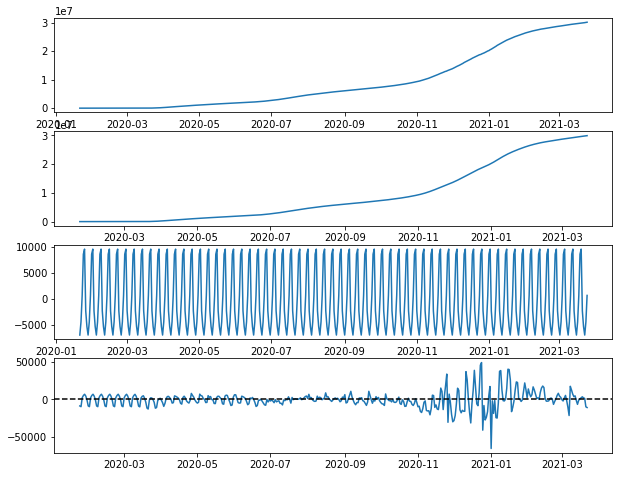

In [123]:
    # Trabalhar primeiro com os dados dos EUA
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_eua.observed) # Observados
ax2.plot(dec_eua.trend) # Tendência
ax3.plot(dec_eua.seasonal) # Sazonalidade
ax4.plot(casos_eua.index, dec_eua.resid) # Ruído
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

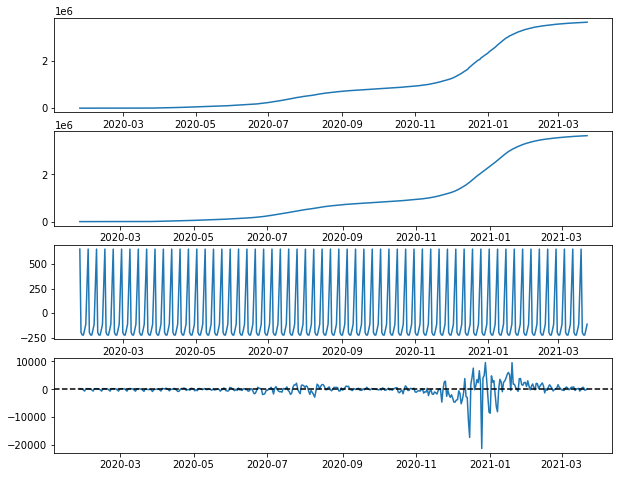

In [124]:
    #Trabalhar com os dados da Califórnia
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_ca.observed)
ax2.plot(dec_ca.trend)
ax3.plot(dec_ca.seasonal)
ax4.plot(casos_ca.index, dec_ca.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

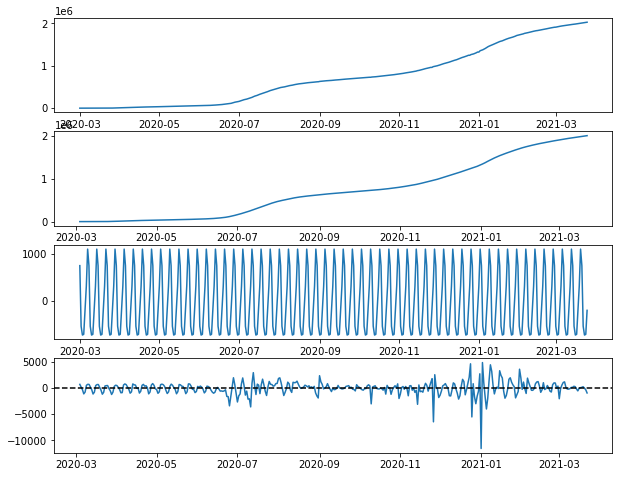

In [125]:
   #Trabalhar com os dados da Flórida
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_fl.observed)
ax2.plot(dec_fl.trend)
ax3.plot(dec_fl.seasonal)
ax4.plot(casos_fl.index, dec_fl.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

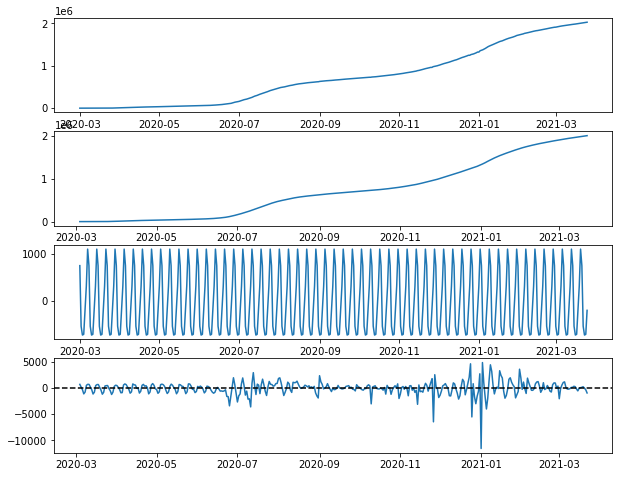

In [126]:
   #Trabalhar com os dados de New York
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_ny.observed)
ax2.plot(dec_ny.trend)
ax3.plot(dec_ny.seasonal)
ax4.plot(casos_ny.index, dec_ny.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

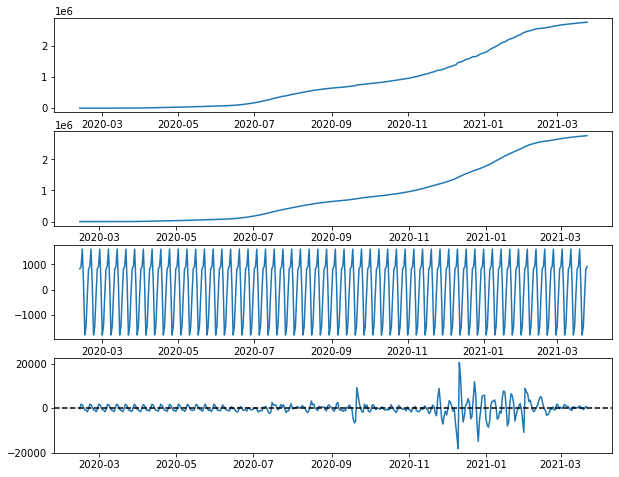

In [127]:
   #Trabalhar com os dados do Texas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_tx.observed)
ax2.plot(dec_tx.trend)
ax3.plot(dec_tx.seasonal)
ax4.plot(casos_tx.index, dec_tx.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

In [128]:
# Agora, as mortes
mortes_eua = database.mortes
mortes_eua.index = database.data
mortes_ca = ca.mortes
mortes_ca.index = ca.data
mortes_fl = fl.mortes
mortes_fl.index = fl.data
mortes_ny = ny.mortes
mortes_ny.index = ny.data
mortes_tx = tx.mortes
mortes_tx.index = tx.data

In [129]:
    #Fazer a decomposição
dec_m_eua = seasonal_decompose(mortes_eua)
dec_m_ca = seasonal_decompose(mortes_ca)
dec_m_fl = seasonal_decompose(mortes_fl)
dec_m_ny = seasonal_decompose(mortes_fl)
dec_m_tx = seasonal_decompose(mortes_tx)

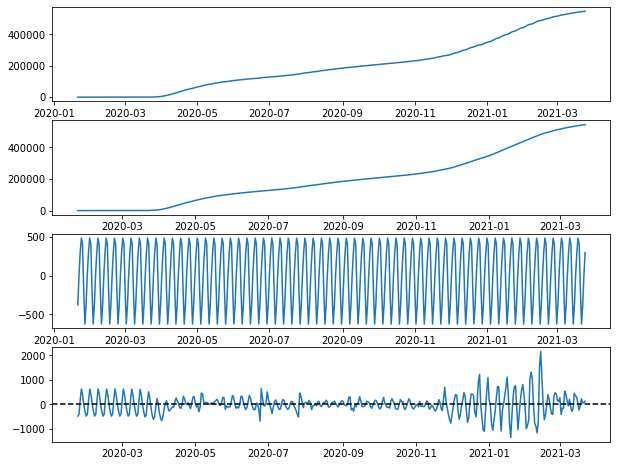

In [130]:
# Trabalhar primeiro com os dados de mortes dos EUA
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_eua.observed) # Observados
ax2.plot(dec_m_eua.trend) # Tendência
ax3.plot(dec_m_eua.seasonal) # Sazonalidade
ax4.plot(mortes_eua.index, dec_m_eua.resid) # Ruído
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

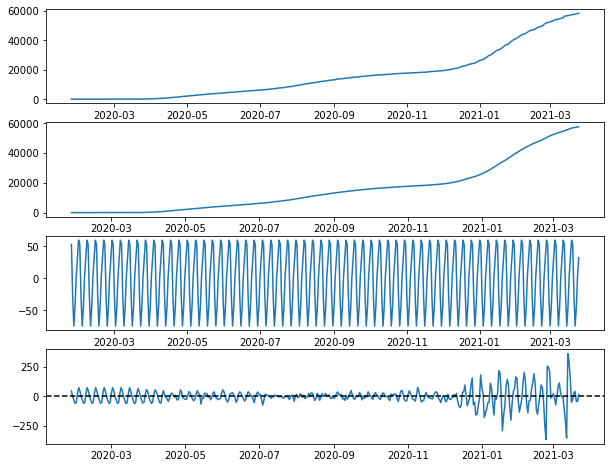

In [131]:
    #Trabalhar com os dados de mortes da Califórnia
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_ca.observed)
ax2.plot(dec_m_ca.trend)
ax3.plot(dec_m_ca.seasonal)
ax4.plot(mortes_ca.index, dec_m_ca.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

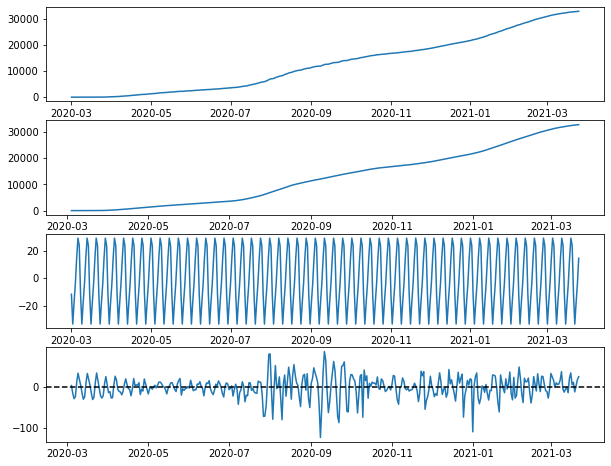

In [132]:
   #Trabalhar com os dados de mortes da Flórida
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_fl.observed)
ax2.plot(dec_m_fl.trend)
ax3.plot(dec_m_fl.seasonal)
ax4.plot(mortes_fl.index, dec_m_fl.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

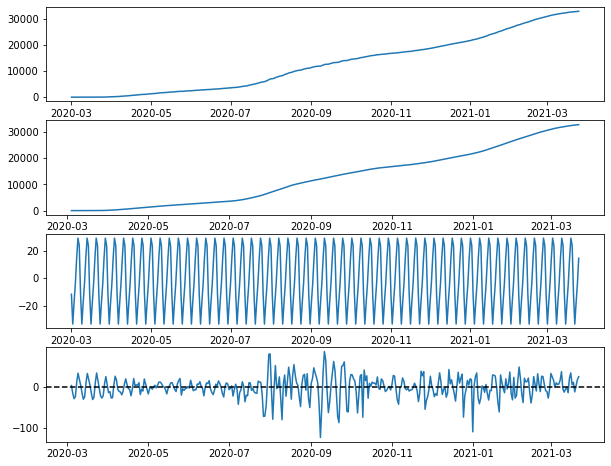

In [133]:
   #Trabalhar com os dados de mortes de New York
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_ny.observed)
ax2.plot(dec_m_ny.trend)
ax3.plot(dec_m_ny.seasonal)
ax4.plot(mortes_ny.index, dec_m_ny.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

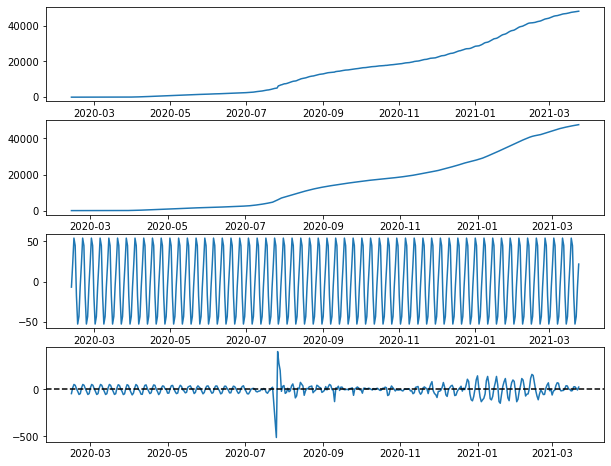

In [134]:
   #Trabalhar com os dados do Texas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_tx.observed)
ax2.plot(dec_m_tx.trend)
ax3.plot(dec_m_tx.seasonal)
ax4.plot(mortes_tx.index, dec_m_tx.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

In [135]:
# ARIMA para as previsões
from pmdarima.arima import auto_arima

In [136]:
    # Casos
modelo_eua = auto_arima(casos_eua)
modelo_ca = auto_arima(casos_ca)
modelo_fl = auto_arima(casos_fl)
modelo_ny = auto_arima(casos_ny)
modelo_tx = auto_arima(casos_tx)


In [137]:
# Vamos ver os gráficos das previsões
    # Todo os EUA
fig1 = go.Figure(go.Scatter(
    x = casos_eua.index, y = casos_eua, name="Observados"
))
fig1.add_trace(go.Scatter(
    x = casos_eua.index, y = modelo_eua.predict_in_sample(), name='Previsão'
))
fig1.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y = modelo_eua.predict(280), name='Previsão'
))
fig1.update_layout(title='Previsão de casos até o fim do ano nos EUA, sem levar em conta as vacinações futuras')
fig1.show()

In [138]:
    # Na Califórnia
fig2 = go.Figure(go.Scatter(
    x = casos_ca.index, y = casos_ca, name = "Observados"
))
fig2.add_trace(go.Scatter(
    x = casos_ca.index, y= modelo_ca.predict_in_sample(), name="Previsão"
))
fig2.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y = modelo_ca.predict(280), name="Previsão"
))
fig2.update_layout(title="Previsão de casos até o fim do ano na Califórnia, sem levar em conta as vacinações futuras")
fig2.show()

In [139]:
    # Na Flórida
fig3 = go.Figure(go.Scatter(
    x = casos_fl.index, y = casos_fl, name="Observados"
))
fig3.add_trace(go.Scatter(
    x = casos_fl.index, y = modelo_fl.predict_in_sample(), name="Previsão"
))
fig3.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y = modelo_fl.predict(280), name="Previsão"
))
fig3.update_layout(title="Previsão de casos até o fim do ano na Flórida, sem levar em conta as vacinações futuras")
fig3.show()

In [140]:
    # Em New York
fig4 = go.Figure(go.Scatter(
    x = casos_ny.index, y= casos_ny, name="Observados"
))
fig4.add_trace(go.Scatter(
    x = casos_ny.index, y = modelo_ny.predict_in_sample(), name="Previsão"
))
fig4.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y= modelo_ny.predict(280), name="Previsão"
))
fig4.update_layout(title="Previsão de casos até o fim do ano em New York, sem levar em conta as vacinações futuras")
fig4.show()

In [141]:
    # No Texas
fig5 = go.Figure(go.Scatter(
    x = casos_tx.index, y= casos_tx, name="Observados"
))
fig5.add_trace(go.Scatter(
    x = casos_tx.index, y= modelo_tx.predict_in_sample(), name="Previsão"
))
fig5.add_trace(go.Scatter(
    x= pd.date_range("2021-03-26", "2021-12-31"), y = modelo_tx.predict(280), name="Previsão"
))
fig5.update_layout(title="Previsão de casos até o fim do ano no Texas, sem levar em conta as vacinações futuras")
fig5.show()

In [142]:
# Agora, vamos trabalhar com previsões para as mortes
modelo_eua_m = auto_arima(mortes_eua)
modelo_ca_m = auto_arima(mortes_ca)
modelo_fl_m = auto_arima(mortes_fl)
modelo_ny_m = auto_arima(mortes_ny)
modelo_tx_m = auto_arima(mortes_tx)

In [143]:
 # Vamos ver os gráficos das previsões
    # Todo os EUA
fig5 = go.Figure(go.Scatter(
    x = mortes_eua.index, y = mortes_eua, name="Observados"
))
fig5.add_trace(go.Scatter(
    x = mortes_eua.index, y = modelo_eua_m.predict_in_sample(), name='Previsão'
))
fig5.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y = modelo_eua_m.predict(280), name='Previsão'
))
fig5.update_layout(title='Previsão de mortes até o fim do ano nos EUA, sem levar em conta as vacinações futuras')
fig5.show()

In [144]:
    # Na Califórnia
fig6 = go.Figure(go.Scatter(
    x = mortes_ca.index, y = mortes_ca, name = "Observados"
))
fig6.add_trace(go.Scatter(
    x = mortes_ca.index, y= modelo_ca_m.predict_in_sample(), name="Previsão"
))
fig6.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y = modelo_ca_m.predict(280), name="Previsão"
))
fig6.update_layout(title="Previsão de casos até o fim do ano na Califórnia, sem levar em conta as vacinações futuras")
fig6.show()


In [145]:
    # Na Flórida
fig7 = go.Figure(go.Scatter(
    x = casos_fl.index, y = casos_fl, name="Observados"
))
fig7.add_trace(go.Scatter(
    x = casos_fl.index, y = modelo_fl.predict_in_sample(), name="Previsão"
))
fig7.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y = modelo_fl.predict(280), name="Previsão"
))
fig7.update_layout(title="Previsão de casos até o fim do ano na Flórida, sem levar em conta as vacinações futuras")
fig7.show()

In [146]:
    # Em New York
fig8 = go.Figure(go.Scatter(
    x = mortes_ny.index, y= mortes_ny, name="Observados"
))
fig8.add_trace(go.Scatter(
    x = mortes_ny.index, y = modelo_ny_m.predict_in_sample(), name="Previsão"
))
fig8.add_trace(go.Scatter(
    x = pd.date_range("2021-03-26", "2021-12-31"), y= modelo_ny_m.predict(280), name="Previsão"
))
fig8.update_layout(title="Previsão de casos até o fim do ano em New York, sem levar em conta as vacinações futuras")
fig8.show()

In [147]:
    # No Texas
fig9 = go.Figure(go.Scatter(
    x = mortes_tx.index, y= mortes_tx, name="Observados"
))
fig9.add_trace(go.Scatter(
    x = mortes_tx.index, y= modelo_tx_m.predict_in_sample(), name="Previsão"
))
fig9.add_trace(go.Scatter(
    x= pd.date_range("2021-03-26", "2021-12-31"), y = modelo_tx_m.predict(280), name="Previsão"
))
fig9.update_layout(title="Previsão de casos até o fim do ano no Texas, sem levar em conta as vacinações futuras")
fig9.show()